# Task 1
A customer informed their consultant that they have developed several formulations of petrol
that gives different characteristics of burning pattern. The formulations are obtaining by adding
varying levels of additives that, for example, prevent engine knocking, gum prevention, stability
in storage, and etc. However, a third party certification organisation would like to verify if the
formulations are significantly different, and request for both physical and statistical proof. Since
the formulations are confidential information, they are not named in the dataset.

In [4]:
#Import all the neccessary frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# might be needed depending on your version of Jupyter
%matplotlib inline

In [5]:
#Read the csv using pandas
df = pd.read_csv('../PreScreen_r3/ingredient.csv')
df.head(10)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [6]:
#Check the shape
df.shape

(214, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [6]:
#Check for any null values under an entire DataFrame
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

* There are no null values in the dataset
* All the features are numerical

In [7]:
len(df.columns)

9

## a) A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

In [8]:
# List of all the numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

In [9]:
num_vars

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [10]:
# We Start of with calculating the mean and median
mean_ingredient = round(df.mean(),2)
median_ingredient = round(df.median(),2)

In [11]:
mean_ingredient

a     1.52
b    13.41
c     2.68
d     1.44
e    72.65
f     0.50
g     8.96
h     0.18
i     0.06
dtype: float64

In [12]:
median_ingredient

a     1.52
b    13.30
c     3.48
d     1.36
e    72.79
f     0.56
g     8.60
h     0.00
i     0.00
dtype: float64

In [13]:
# Calculate the variance and the standard deviation 
var_ingredient = round(df.var(),2)
std_ingredient = round(df.std(),2)

In [14]:
var_ingredient

a    0.00
b    0.67
c    2.08
d    0.25
e    0.60
f    0.43
g    2.03
h    0.25
i    0.01
dtype: float64

In [15]:
std_ingredient

a    0.00
b    0.82
c    1.44
d    0.50
e    0.77
f    0.65
g    1.42
h    0.50
i    0.10
dtype: float64

## Findings :
* The mean and median values are very close to each other
* The variance and standard deviation is not so close to each other

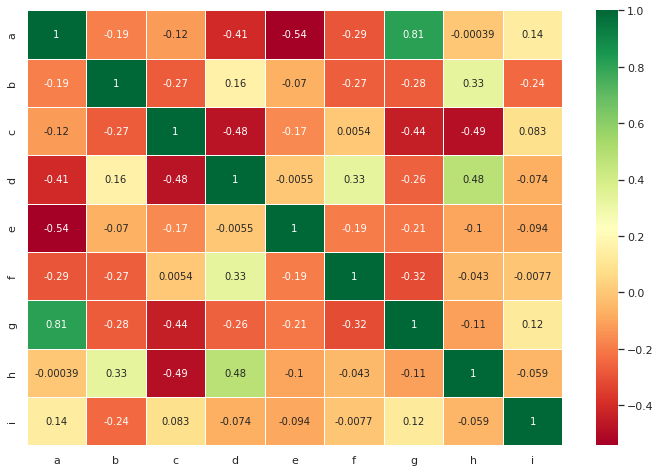

In [16]:
# We use heatmap to check the correlation between datas
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

* Correlation is a measure of how strong a relationship between two variables


* Positive Correlation: both variables change in the same direction
* Neutral Correlation: No relationship in the change of the variables
* Negative Correlation: variables change in opposite directions


* From the above heatmap we can know that feature a & g are highly correlated
* We can remove either one to perform any machine learning work because both of it have similar information

## Findings
* a & g are highly positively correlated with 0.81 which is nearing to 1 and a & e are negatively corrrelated with -0.54 which is far off 1

## b) A graphical analysis of the additives, including a distribution study.

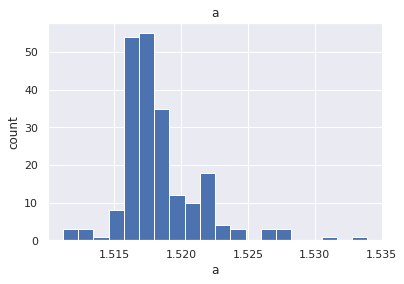

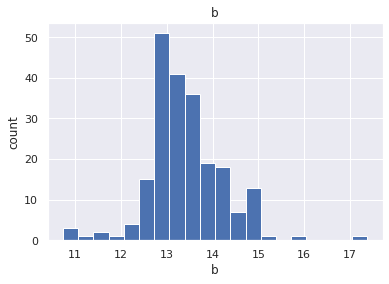

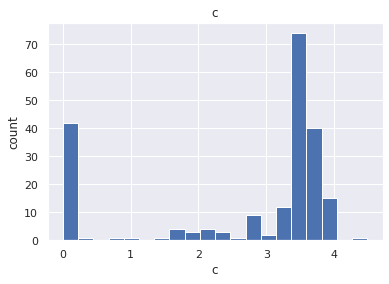

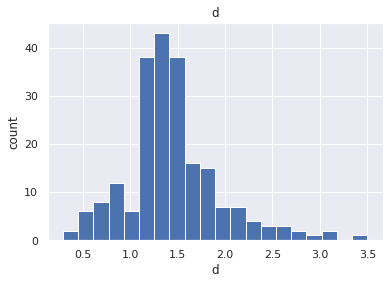

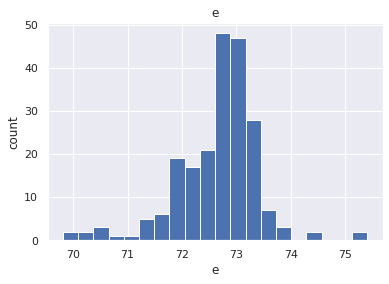

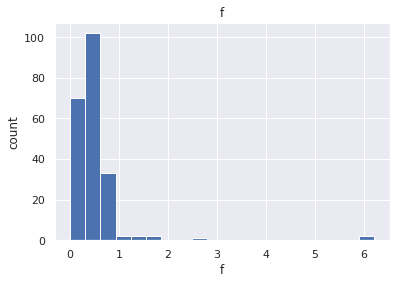

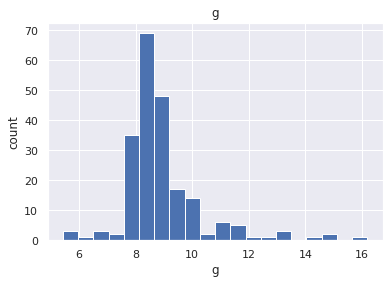

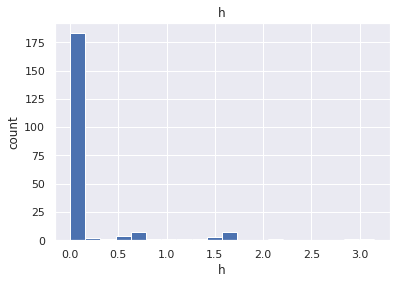

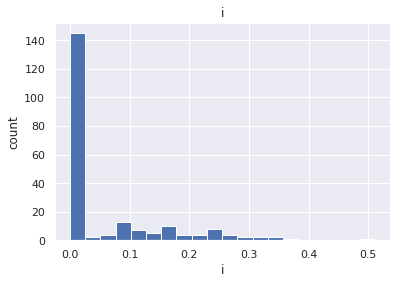

In [18]:
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(df, var)

## Findings
* a,d,f,g,h & i are positively skewed (right skewed)
* b have a slightly negatively skewed (left skewed)
* e have almost a normal distribution
* c have a left negatively skewed except for the first 

## c) A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
X = df.copy()

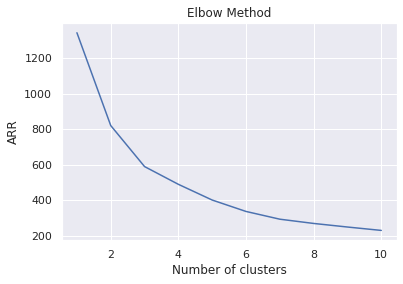

In [8]:
arr = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    arr.append(kmeans.inertia_)
plt.plot(range(1, 11), arr)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('ARR')
plt.show()

* We can take K value to 3 from using the elbow method 

In [45]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [46]:
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [47]:
len(pred_y)

214

In [48]:
df['predictions3'] = pd.DataFrame(pred_y)

In [49]:
df.head()

,a,b,c,d,e,f,g,h,i,predictions1,predictions2,predictions4,predictions3
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,0,1,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,3,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,0,1,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,0,1,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,0,1,1


In [50]:
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [51]:
df.predictions1.value_counts()

1    162
0     31
2     21
Name: predictions1, dtype: int64

In [52]:
X.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00



## Lets scale the features using minmaxscaler and see if we can slighlty better results


In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_scaled[:5]

array([[0.27216857, 0.3443609 , 0.78841871, 0.43613707, 0.52142857,
        0.08695652, 0.27973978, 0.        , 0.1372549 ],
       [0.88235294, 0.        , 0.        , 0.56386293, 0.        ,
        0.09339775, 0.73141264, 1.        , 0.54901961],
       [0.52019315, 0.38796992, 0.79732739, 0.16510903, 0.38928571,
        0.01932367, 0.44052045, 0.        , 0.05882353],
       [0.28665496, 0.27518797, 0.78396437, 0.35514019, 0.59642857,
        0.09178744, 0.28903346, 0.        , 0.        ],
       [0.30640913, 0.40601504, 0.88641425, 0.27725857, 0.47857143,
        0.09339775, 0.2527881 , 0.        , 0.        ]])

In [55]:
pred_y = kmeans.fit_predict(X_scaled)

In [56]:
pred_y

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [57]:
df['predictions2'] = pd.DataFrame(pred_y) # Add additional prediction to the dataframe

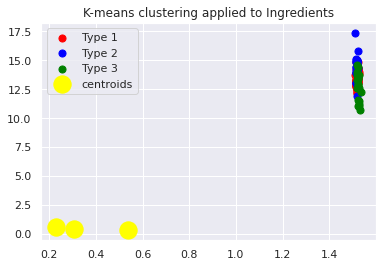

In [58]:
#Lets visualize the clusters and their centroids together

plt.figure(2)
plt.scatter(X.iloc[pred_y == 0, 0], X.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[pred_y == 1, 0], X.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[pred_y == 2, 0], X.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Ingredients")

plt.legend()
plt.show()

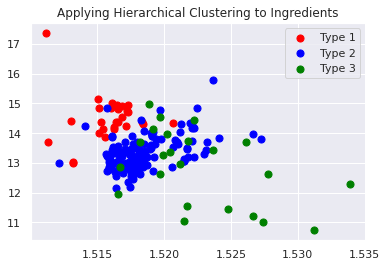

In [59]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.title('Applying Hierarchical Clustering to Ingredients')

plt.legend()
plt.show()

In [60]:
df['predictions4'] = pd.DataFrame(y_hc)

In [61]:
df.head()

,a,b,c,d,e,f,g,h,i,predictions1,predictions2,predictions4,predictions3
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,0,1,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,2,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,0,1,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,0,1,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,0,1,1


In [62]:
df.drop(['predictions2','predictions3'], axis=1, inplace=True)

In [63]:
df.head()

,a,b,c,d,e,f,g,h,i,predictions1,predictions4
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,1


* The predictions from both algorithms looks quite similiar with a few exceptions.